# Exercise 2: Data Processing and Analysis

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()
""""
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check"
"""

'"\ntry:\n    from gofer.ok import check\nexcept:\n    %pip install git+https://github.com/grading/gradememaybe.git\n    from gofer.ok import check"\n'

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [25]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [26]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [27]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [28]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [29]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [30]:
print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [31]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [32]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
print(HeartRateMean)


75.13268404820141


In [33]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_33586/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_33586/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [34]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [35]:
grader.check('q2')

Question 2 results:
    Question 2 - 1 result:
        ❌ Test case failed
        Trying:
            bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
        Expecting:
            True
        ok
        Trying:
            HeartRateMean == fullTableHRMean
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 2 0
        Failed example:
            HeartRateMean == fullTableHRMean
        Expected:
            True
        Got:
            np.True_

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

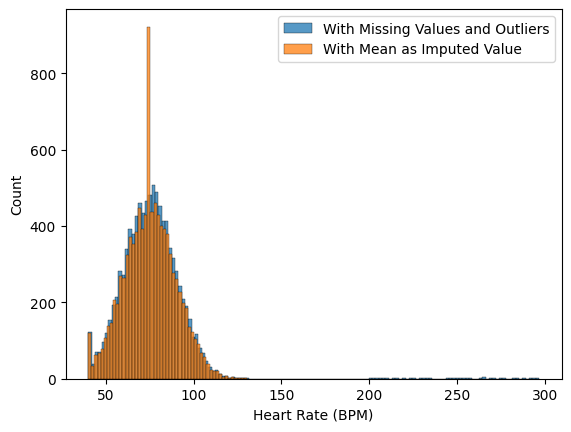

In [36]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 

After the imputation, the median decreased very slightly (by about 0.1), and it is now equal to the mean.

In [37]:
## coding cell to check the difference in median values 

oldHeartRateMedian = smartwatch['Heart Rate (BPM)'].median()
newHeartRateMedian = smartwatch_hr['Heart Rate (BPM)'].median()

print(oldHeartRateMedian, newHeartRateMedian)


75.22060125775644 75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [38]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [39]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

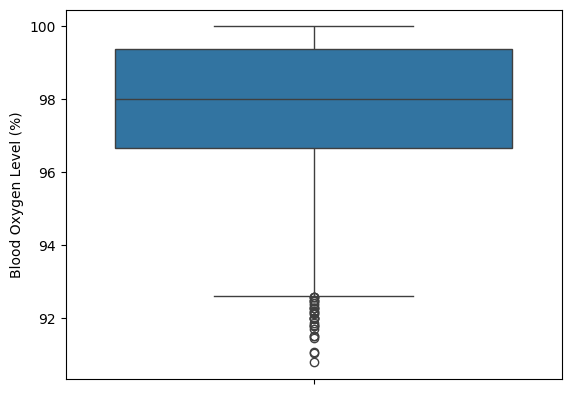

In [40]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: 

I decided to replace missing values with the mean blood oxygen level. I chose not the remove outliers because the min blood oxygen level is still possible (unlike the max heart rate), even though it is outside the healthy range. I don't want to discard data of blood oxygen levels outside of the "normal" range.

In [41]:
## use this space or additional cells to deal with the missing/outlier values. 

nullBloodO2Rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]
nullBloodO2Rows['Blood Oxygen Level (%)'] = meanBloodO2
##print(len(nullBloodO2Rows))

bloodO2Rows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull())]
##print(bloodO2Rows)

smartwatch_o2 = pd.concat([nullBloodO2Rows, bloodO2Rows])
print(smartwatch_o2)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
818    3156.0         75.132684               97.841581   7281.778831   
8369   2283.0         75.132684               97.841581  21495.639335   
1615   1417.0         75.132684               97.841581   1585.892722   
1712   4079.0         75.132684               97.841581  19003.921284   
4690   2829.0         75.132684               97.841581   6610.794796   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
818       4.300171191258864      Sedentary            3  
8369   

/tmp/ipykernel_33586/2037985360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullBloodO2Rows['Blood Oxygen Level (%)'] = meanBloodO2


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [42]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [43]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 

I decided to replace any step counts below 100 with the mean value because step counts that low are likely the result of the watch malfunctioning or not being worn. I also replaced any null values with the mean. I kept the outliers that were on the high end because those step counts are still possible if the person was doing an activity such as a marathon.

In [44]:
## use this space or additional cells to address the missing or outlier data. 
##sns.histplot(smartwatch['Step Count'], label ='With Missing Values and Outliers')
##plt.legend()

outlierStepRows = smartwatch_o2[smartwatch_o2['Step Count'] < 100]
nullStepRows = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]
stepRows = smartwatch_o2[(~smartwatch_o2['Step Count'].isnull()) & (smartwatch_o2['Step Count'] >= 100)]

outlierStepRows['Step Count'] = meanSteps
nullStepRows['Step Count'] = meanSteps

smartwatch_steps = pd.concat([outlierStepRows, nullStepRows, stepRows])

print(smartwatch_steps)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2037   4232.0         77.067628               97.841581   6985.685885   
3546   4839.0         88.772113               97.841581   6985.685885   
4450   4736.0         65.184448               97.841581   6985.685885   
9654   2898.0         75.132684               96.082553   6985.685885   
1262   4465.0         75.132684               97.113032   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
2037        8.0129480366265         Active            4  
3546   

/tmp/ipykernel_33586/2277524060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierStepRows['Step Count'] = meanSteps
/tmp/ipykernel_33586/2277524060.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullStepRows['Step Count'] = meanSteps


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [45]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

print(minSleep)

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [46]:
for item in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(item)  ## first try to see if it can be converted to a number
    except:
        print(item)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [47]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
print(errorTable)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
1262   4465.0         75.132684               97.113032   6985.685885   
5829   1992.0         64.961574               99.026860   6985.685885   
7976   1297.0         91.422344               99.191585   6985.685885   
8642   3476.0         75.132684               99.462778   6985.685885   
1456   2997.0         54.116580               95.631824   6985.685885   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

     Sleep Duration (hours) Activity Level Stress Level  
1262                  ERROR  Highly_Active            6  
5829   

Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [48]:
errorTable['Sleep Duration (hours)'] = np.nan

print(errorTable)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
1262   4465.0         75.132684               97.113032   6985.685885   
5829   1992.0         64.961574               99.026860   6985.685885   
7976   1297.0         91.422344               99.191585   6985.685885   
8642   3476.0         75.132684               99.462778   6985.685885   
1456   2997.0         54.116580               95.631824   6985.685885   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

      Sleep Duration (hours) Activity Level Stress Level  
1262                     NaN  Highly_Active            6  
5829 

/tmp/ipykernel_33586/2212040875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [49]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

print(smartwatch_sleep)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2037   4232.0         77.067628               97.841581   6985.685885   
3546   4839.0         88.772113               97.841581   6985.685885   
4450   4736.0         65.184448               97.841581   6985.685885   
9654   2898.0         75.132684               96.082553   6985.685885   
1262   4465.0         75.132684               97.113032   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
2037                8.012948         Active            4  
3546 

Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [50]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

print(minSleep, maxSleep, meanSleep)

-0.1944527906201543 12.140232872862926 6.505462918406444


In [51]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 

I decided to replace negative values with the mean because those are not possible. The upper end outliers are at most 12 hours, which is still possible, so I kept those. I also replaced the null values (previously ERROR) with the mean.

In [53]:
## use this space or additional cells to address the missing or outlier data. 
##sns.histplot(smartwatch_sleep['Sleep Duration (hours)'], label ='With Missing Values and Outliers')
##plt.legend()

outlierSleepRows = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] < 0]
nullSleepRows = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
sleepRows = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_sleep['Sleep Duration (hours)'] >= 0)]

outlierSleepRows['Sleep Duration (hours)'] = meanSleep
nullSleepRows['Sleep Duration (hours)'] = meanSleep

smartwatch_updated_sleep = pd.concat([outlierSleepRows, nullSleepRows, sleepRows])

print(smartwatch_updated_sleep)



      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3366   1608.0         78.832837              100.000000   7122.866517   
1262   4465.0         75.132684               97.113032   6985.685885   
5144   1234.0         91.734823               97.039536   6985.685885   
5829   1992.0         64.961574               99.026860   6985.685885   
7489   1366.0         45.719594               99.576891   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
3366                6.505463      Sedentary           10  
1262 

/tmp/ipykernel_33586/3130244200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleepRows['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_33586/3130244200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleepRows['Sleep Duration (hours)'] = meanSleep


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [54]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
I decided to replace it with the max stress level since that is probably close to what "very high" is meant to represent.

In [ ]:
## cell to deal with 'Very High' value
errorTable = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == 'Very High']
nonErrorTable = smartwatch_updated_sleep[~(smartwatch_updated_sleep['Stress Level'] == 'Very High') & ~(smartwatch_updated_sleep['Stress Level'].isnull())]
nonErrorTable['Stress Level'] = pd.to_numeric(nonErrorTable['Stress Level'], errors='coerce')

stressMax = nonErrorTable['Stress Level'].max()
stressTable = smartwatch_updated_sleep[~(smartwatch_updated_sleep['Stress Level'] == 'Very High')]
errorTable['Stress Level'] = stressMax

smartwatch_stress = pd.concat([errorTable, stressTable])

print(smartwatch_stress)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
1700   1777.0         63.996994               95.465595  14088.912805   
2421   4380.0         96.907879               97.099425    319.741554   
2403   2980.0         86.049161               97.042221   6985.685885   
379    4170.0         70.455114               97.841581   4452.438735   
4302   2904.0         77.265298               97.841581   5015.965189   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
1700                6.505463  Highly Active           10  
2421 

/tmp/ipykernel_33586/2860349417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonErrorTable['Stress Level'] = pd.to_numeric(nonErrorTable['Stress Level'], errors='coerce')
/tmp/ipykernel_33586/2860349417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Stress Level'] = stressMax


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [67]:
print(smartwatch['Activity Level'].unique())

['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [69]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 
##print(highlyActive)


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
print(final_table)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
1700   1777.0         63.996994               95.465595  14088.912805   
2403   2980.0         86.049161               97.042221   6985.685885   
5823   3775.0         75.132684               97.095137   2092.055907   
3963   4670.0         70.659253               99.072904   6042.576181   
4551   1726.0         91.127561              100.000000   4213.519341   
...       ...               ...                     ...           ...   
9842   2108.0         71.152455               98.585987   1480.777008   
9845   4203.0         91.417098               95.383875   1238.788704   
9867   2674.0         69.075313               99.067026   2759.328767   
9898   1409.0         79.941705               98.716816    619.353083   
9991   4289.0         91.381582               95.741838   3930.126338   

      Sleep Duration (hours) Activity Level Stress Level  NumActivity  
1700                6.505463  Highly Active        

/tmp/ipykernel_33586/702805076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_33586/702805076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_33586/702805076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [70]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level              200
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [71]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1700 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
 7   NumActivity             9800 non-null   float64
dtypes: float64(6), object(2)
memory usage: 703.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:

The points are most concentrated in the lower middle, between x = 60-90 and y < 10,000 (closer to y = 0). There is also a visible horizontal line around y = 7,000 and a vertical line around x = 75.

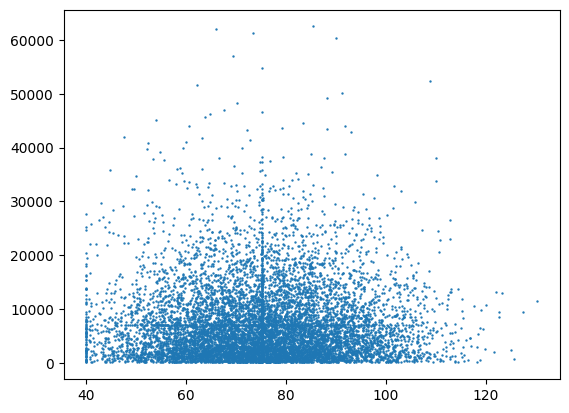

In [81]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=0.5)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:

The horizontal and vertical lines are not present because those are the null values that were replaced by the means.

In [80]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

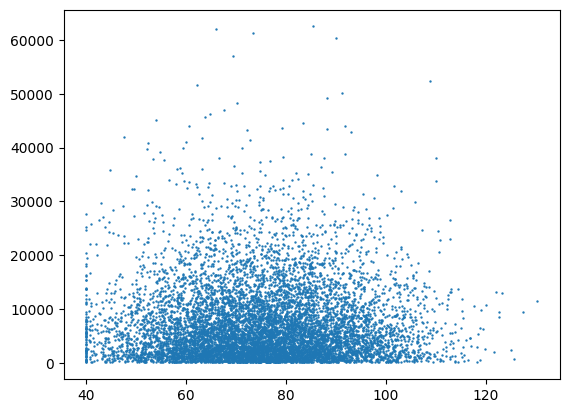

In [82]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Step Count'], s = 0.5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

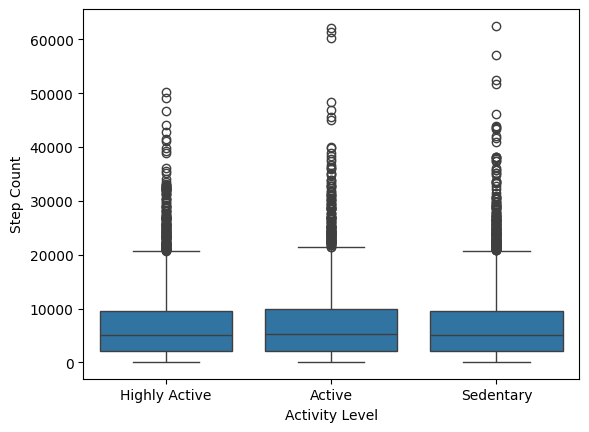

In [88]:
## Visualization 

sns.boxplot(x='Activity Level', y='Step Count', data=final_table)

##citation: asked chatgpt how to make boxplot in python with data from multiple columns of table


In [90]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['NumActivity'] == 3]  # Sedentary rows
act = final_table[final_table['NumActivity'] == 2]  # Active rows
hact = final_table[final_table['NumActivity'] == 1]  # Highly active rows

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.175, p-value: 0.839


Is there significant difference between the groups' step counts?  

ANSWER:

No, the median data appears to be almost exactly the same across the different activity levels. The outlier values are actually higher in the sedentary and active levels than the highly active level. I suspect that this is due to the data being artificially generated, so correlation between steps and activity level was not taken into account (I noticed this when looking at the table). However, even in real life step count and activity level may not always correspond, such as if someone does an activity that does not involve taking steps such as swimming or weight lifting.

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:

I would be sure to outline the exact steps I took to clean the data, including each time I replaced outlier or missing values with the mean value, and any other changes I made (like replacing very high with the max stress level). I would also mention that when looking at outlier data, I tried to only remove data that was physically impossible or highly unlikely in order to preserve the data as much as possible, and not include my own biases on what "normal" data should look like. I also replaced the outlier/missing data with the mean rather than removing it entirely so that the person who's data that is will still be counted, and the other data in their row is preserved. Only after outlining these steps would I then communicate the insights drawn from the data. That way, people have a complete picture of the data and understand that there could be significant changes to the data as a result of the cleaning process.